# Laboratorio percettrone

In [1]:
%plot -f svg
graphics_toolkit("gnuplot")

## Implementazione del percettrone 

Classifica un insieme di pattern in due classi.
Gli inputs sono reali e gli output sono bipolari, 1 o -1.

- Ci sono `m` inputs più l'input del bias, posto sempre uguale a -1.
- Ci sono `m+1` pesi che connettono gli input e il bias con l'unico output y.
- Gli `m+1` pesi compongono un vettore `W`, inizialmente casuale.
- La funzione di attivazione è il segno.

In entrata viene data una matrice `X` (input) che ha `m` colonne, una per input, e `t` righe, dove `t` è il numero dei pattern da apprendere.
I pattern sono `m`-dimensionali.

In ingresso viene dato anche il vettore colonna `T` (target) di `t` righe,
che contiene i valori da apprendere (+1 o -1, che identificano le due classi).
`n` è il numero di epoche fissate per l'apprendimento.

Uso: `[a, b] = percett(X, T, n);`

`a` contiene la storia dei pesi e `b` la storia del numero di pattern appresi.

In [2]:
function [storiapesi,storiappresi]=percett(X,T,n);
    [t, m] = size(X);
    % Inizializza il vettore dei pesi.
    % Il vettore ha dimensione m+1 per ospitare anche il peso corrispondente al bias.
    W = rand(1, m+1);
    
    % Si aggiunge all'input una colonna corrispondente al bias, sempre uguale a -1.
    X(:, m+1) = -ones(t,1);
    
    % Matrice contenente i pesi a ogni iterazione. Ogni colonna corrisponde a una nuova iterazione.
    storiapesi = zeros(m+1,n); 
    % Vettore che contiene quanti pattern sono stati classificati correttamente in ogni epoca.
    storiappresi = zeros(1,n);

    for i=1:n
        % Aggiunge il vettore corrente dei pesi alla storia dei pesi in output.
        storiapesi(:, i) = W';
        
        % Attivazione del neurone: moltiplica il vettore dei pesi per la matrice degli input trasposta.
        % In questo modo, dato che a ogni colonna di X' corrisponde uno degli esempi di training,
        % si va a moltiplicare ogni input dell'esempio per ogni peso corrispondente, per poi sommare
        % tutti risultati delle moltiplicazioni di uno stesso esempio.
        
        % Il risultato è un vettore riga che contiene le t uscite.
        Y = sign(W*X'); 
        
        % Salvo quanti esempi sono stati classificati correttamente all'iterazione i.
        storiappresi(i)=sum(T'==Y);
        
        % Itero sui risultati degli esempi
        for j=1:t
            % Se il risultato non è uguale a quello desiderato, applico la regola di correzione dei pesi.
            if ne(Y(j),T(j))
                W = W + T(j)*X(j,:); 
            end
        end
    end
end

Utilizza il percettrone dopo che i pattern sono stati appresi.
Riceve `W` e una matrice di pattern, e restituisce una colonna di risposte, una per ogni pattern.

In [3]:
function ris = usaperc(W,P);
    % t patterns m dimensionali
    [t, m] = size(P);
    
    % si aggiunge una colonna di -1 a P: è il valore fisso del bias
    P(:, m+1) =- ones(t,1); 

    w=size(W,2);

    if ne(w,m+1)
       error('dimensioni errate!')
    end

    % attivazione
    ris=sign(W*P')';
end

### Esempio sul dataset `fung.mat`:

percentuale appresa correttamente : 99.507632 per cento 
z =  4024
risultati corretti su funghi mai visti : 99.064500 per cento 


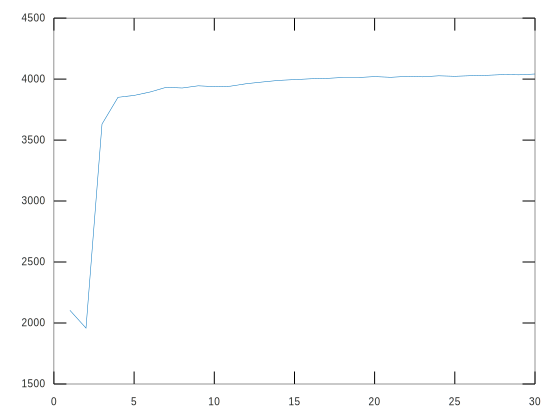

In [4]:
global fun1i;

function fung(epoch_count);
    % presuppone che fung sia stato caricato e che ci sia in memoria la matrice fun 8124x127
    load fung

    % coppie di apprendimento

    % per l'esercizio al punto 2
    global fun1i
    
    fun1i=fun(1:4062,1:125);
    fun1t=2*fun(1:4062,126)-1;

    % coppie per il test
    fun2i=fun(4063:8124,1:125);
    fun2t=2*fun(4063:8124,126)-1;

    rand('state',1992)

    % apprendimento
    [u,v]=percett(fun1i, fun1t, epoch_count);

    figure(1)
    plot(v)
    fprintf('percentuale appresa correttamente : %f per cento \n',(max(v)/4062)*100)

    % indice del primo massimo
    [hh,h]=max(v);

    % riga dei pesi ottimale
    W=u(:,h)';

    % test
    ris=usaperc(W,fun2i);
    z=sum(ris==fun2t)
    fprintf('risultati corretti su funghi mai visti : %f per cento \n',(z/4062)*100)
end

fung(30)

### Esempio sul dataset `cancer1.mat`

risposte corrette - nella fase di apprendimento - su 350 
ans =  338
risposte corrette - nella fase di test - su 349 
ans =  340


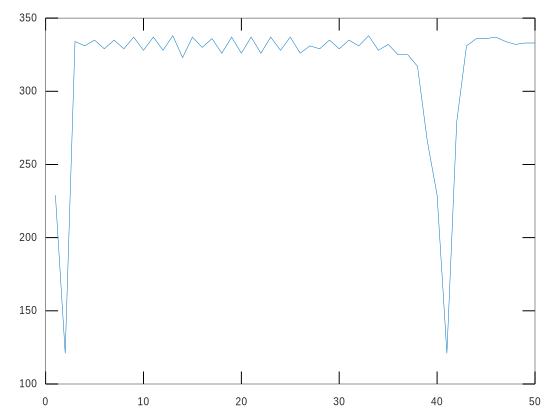

In [5]:
function cancer(epoch_count);

    load cancer1
    % si suppone caricata cancer1; in memoria cancer1 699X11

    % coppie di apprendimento
    cancer1i=cancer1(1:350,1:9);
    cancer1t=2*cancer1(1:350,10)-1;

    % coppie per il test
    cancer2i=cancer1(351:699,1:9);
    cancer2t=2*cancer1(351:699,10)-1;

    rand('state',1992)

    % apprendimento
    [u,v]=percett(cancer1i, cancer1t, epoch_count);

    display('risposte corrette - nella fase di apprendimento - su 350 ')
    max(v)
    figure(1)
    plot(v)

    % indice del primo massimo
    [z,h]=max(v); 

    % riga dei pesi ottimale
    W=u(:,h)'; 

    % test
    ris=usaperc(W,cancer2i);

    display('risposte corrette - nella fase di test - su 349 ')
    sum(ris==cancer2t)

end

cancer(50)

# Esercizi di laboratorio
1. Commentare il codice di `percett`, descrivendo a cosa corrisponde ogni istruzione. Si specifichi anche la dimensione delle variabili (numero di righe, numero di colonne), cercando di capire il perché di questi valori.

2. Visualizzare le prime 5 colonne delle prime 10 righe della matrice `fun1i`

In [6]:
fun1i(1:10,1:5)

ans =

   0   0   1   0   0
   0   0   1   0   0
   0   0   1   0   0
   0   0   1   0   0
   0   0   1   0   0
   0   0   1   0   0
   1   0   0   0   0
   0   0   0   1   0
   0   0   0   1   0
   0   0   0   1   0



3. Cambiare il numero delle iterazioni previste nell’algoritmo di `percett`

> ?

4. Che significato hanno le variabili `t` ed `n` definite in `percett`?

> `t` è il numero di pattern da far imparare al percettrone.  
> `n` è il numero di epoche per cui si vuole fare l'addestramento.

5. Perché `W` ha dimensione `m+1`?

> Perché contiene un peso per ogni input del percettrone, più un peso per il bias.

6. Cosa contengono le variabili `storiapesi` e `storiappresi` in uscita dopo l’esecuzione di `percett`?

> `storiapesi` contiene il valore del vettore dei pesi per ogni iterazione.  
> `storiappresi` contiene quanti valori vengono classificati correttamente a ogni iterazione. 

7. In `percett` qual è l’istruzione di updating del vettore dei pesi?

> ```octave
> if ne(Y(j),T(j))
>     W = W + T(j)*X(j,:); 
> end
> ```

8. Si consideri `funghi`, commentando ogni istruzione. Si commenti anche `usaperc`
9. In quale gruppo di istruzioni i pesi vengono utilizzati sul test set e non più sul training set?

> ```octave
> % test
> ris=usaperc(W,fun2i);
> z=sum(ris==fun2t)
> fprintf('risultati corretti su funghi mai visti : %f per cento \n',(z/4062)*100)
> ```

10. A cosa si riferiscono le percentuali visualizzate?

> In `percentuale appresa correttamente`, il numero visualizzato è la percentuale di pattern classificati
> correttamente dal percettrone nella fase di apprendimento, nell'iterazione in cui ha dato i risultati 
> migliori.
>
> In `risultati su funghi mai visti`, la percentuale indica quanti funghi sono stati classificati correttamente
> nella fase di test, ovvero su dati che non sono stati usati durante l'apprendimento.

11. Modificare il numero di iterazioni per vedere se  il risultato cambia

percentuale appresa correttamente : 100.000000 per cento 
z =  4050
risultati corretti su funghi mai visti : 99.704579 per cento 


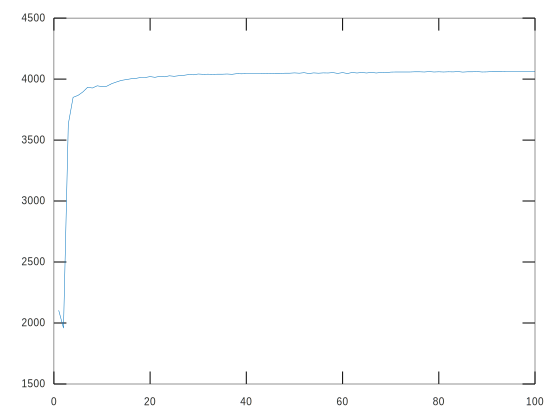

In [7]:
fung(100)

percentuale appresa correttamente : 98.966027 per cento 
z =  4002
risultati corretti su funghi mai visti : 98.522895 per cento 


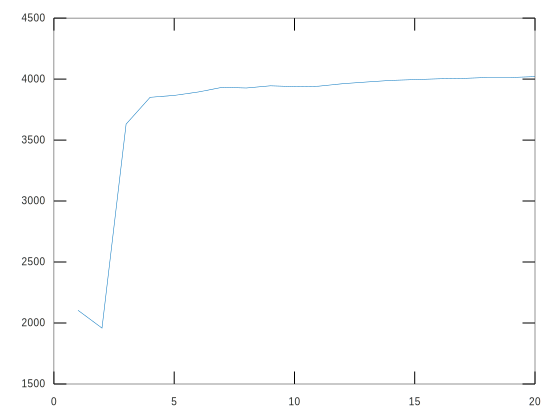

In [8]:
fung(20)

12. Si ripetano i due punti sopra per `cancer`.

risposte corrette - nella fase di apprendimento - su 350 
ans =  338
risposte corrette - nella fase di test - su 349 
ans =  340


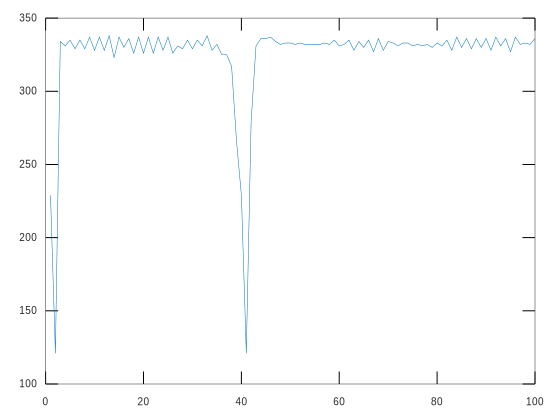

In [9]:
cancer(100)

13. C’è una discrepanza fondamentale tra questa implementazione e l’algoritmo visto a lezione: qui l’errore è calcolato per epoch. Fare in modo invece che sia calcolato pattern by pattern.

In [10]:
function [storiapesi,storiappresi]=percettpatt(X,T,n);
    [t,m]=size(X); 
    W=rand(1,m+1);
    X(:,m+1)=-ones(t,1); 
    storiapesi=zeros(m+1,n); 
    storiappresi=zeros(1,n); 

    for i=1:n
        storiapesi(:,i)=W';
        for j=1:t
            Y(j)=sign(W*X(j,:)');
            if ne(Y(j),T(j))
                W=W+T(j)*X(j,:); 
            end
        end
        storiappresi(i)=sum(T'==Y);
    end
end